### **Packages install**

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram
import re
import matplotlib.pyplot as plt
?pip install sentence-transformers
?pip install tf_keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sentence_transformers import SentenceTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import os
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import words

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

# For images analysis
import requests
from sklearn.cluster import KMeans
from PIL import Image
import altair as alt

# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/4075699032.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Object `pip install sentence-transformers` not found.
Object `pip install tf_keras` not found.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_

### **Data Loading**

In [2]:
#original product data with product title + breadcrumb
items_25 = pd.read_csv("/Users/cyrilestier/Desktop/data/input/items_2025.csv") 
#original price data with unit_price x loyalty price x orignal_price
prices_df = pd.read_csv("/Users/cyrilestier/Desktop/data/input/prices_2025_cross_section.csv")
#sam's categorized data with summary, description, TSD = title + summary + description, processed, breadcrumb_clean, Category, title summary 
categorized = pd.read_csv("/Users/cyrilestier/Desktop/data/input/categorized_items5.csv")
#hand labelled data with our own product gender labels 
hand_label = pd.read_csv("/Users/cyrilestier/Desktop/data/input/combined.csv")
#second batch of hand labelled data 
hand_label_sam = pd.read_csv("/Users/cyrilestier/Desktop/data/input/hand_labeling3_sb.csv")
hand_label_cyril = pd.read_csv("/Users/cyrilestier/Desktop/data/input/hand_labeling2.csv")

---

# <span style="background-color: yellow">**Pre-processing Pipeline**</span> 
Sam's preprocessing pipeline: 1) Merging and processing descriptions  2) Categorization

### Merging and processing

In [3]:
'''tesco_desc = pd.read_csv("../Final Project/tesco_parsed.csv")
asda_desc = pd.read_csv("../Final Project/asda_parsed_item_info.csv")
morrisons_desc = pd.read_csv("../Final Project/detailed_item_info_morrisons_2025-03-18_10-46-10.csv")
waitrose_desc = pd.read_csv("../Final Project/all_waitrose_item_info.csv")
sainsburys_desc = pd.read_csv("../Final Project/sainsburys_product_details.csv")

cols = ['store_id','product_id','product_title','summary','description', 'category']
item_desc = pd.concat([tesco_desc[cols],sainsburys_desc[cols],asda_desc[cols],morrisons_desc[cols],waitrose_desc[cols]])
item_desc_merge = item_desc.merge(items_25[['store_id','product_id','product_breadcrumb','product_url']], how='left', on=['store_id', 'product_id'])
item_desc_merge['product_title'] = item_desc_merge['product_title'].fillna('')
item_desc_merge['summary'] = item_desc_merge['summary'].fillna('')
item_desc_merge['description'] = item_desc_merge['description'].fillna('')
item_desc_merge['product_breadcrumb'] = item_desc_merge['product_breadcrumb'].fillna('')

stop_words = stopwords.words('english')
english_words = set(words.words())

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [word for word in tokens if word in english_words]  # Remove non-english words
    return " ".join(tokens)

# Apply preprocessing
item_desc_merge['TSDB'] = item_desc_merge['TSDB'].astype(str)
item_desc_merge['processed'] = item_desc_merge['TSDB'].apply(preprocess_text)


all_data_processed = item_desc_merge
'''

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/2508279233.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''tesco_desc = pd.read_csv("../Final Project/tesco_parsed.csv")


'tesco_desc = pd.read_csv("../Final Project/tesco_parsed.csv")\nasda_desc = pd.read_csv("../Final Project/asda_parsed_item_info.csv")\nmorrisons_desc = pd.read_csv("../Final Project/detailed_item_info_morrisons_2025-03-18_10-46-10.csv")\nwaitrose_desc = pd.read_csv("../Final Project/all_waitrose_item_info.csv")\nsainsburys_desc = pd.read_csv("../Final Project/sainsburys_product_details.csv")\n\ncols = [\'store_id\',\'product_id\',\'product_title\',\'summary\',\'description\', \'category\']\nitem_desc = pd.concat([tesco_desc[cols],sainsburys_desc[cols],asda_desc[cols],morrisons_desc[cols],waitrose_desc[cols]])\nitem_desc_merge = item_desc.merge(items_25[[\'store_id\',\'product_id\',\'product_breadcrumb\',\'product_url\']], how=\'left\', on=[\'store_id\', \'product_id\'])\nitem_desc_merge[\'product_title\'] = item_desc_merge[\'product_title\'].fillna(\'\')\nitem_desc_merge[\'summary\'] = item_desc_merge[\'summary\'].fillna(\'\')\nitem_desc_merge[\'description\'] = item_desc_merge[\'descr

### Categorizing by products 
 We selected categories at our own discretion based on whether they were more likely to be gendered products. This gave us the possibility of narrowing down and have a more balanced data set.

In [4]:
# Append product title to the end of breadcrumb as final breadcrumb
'''items_25['breadcrumb_title'] = items_25['product_breadcrumb'] + ',' + items_25['product_title']'''

"items_25['breadcrumb_title'] = items_25['product_breadcrumb'] + ',' + items_25['product_title']"

In [5]:
# Define keyword categories
'''keyword_sets = {
    "Other": {"fabric", "cigarette", "cigar", "meal", "frozen", "shaver adapter", "beard oil", "food", "candle", "candles", "birthday card", "unperfumed", "pet", "hand sanitiser"},
    "Body Wash": {"body wash", "shower gel", "body soap"},
    "Shampoo/Conditioner": {"shampoo", "hair wash", "hair cleanser", "conditioner", "hair softener", "hair mask", "hydrating mask", "hair moisturizer", "hair moisturiser"},
    "Razors": {"razor", "shaver", "trimmer", "epilator"},
    "Shaving Cream": {"shaving cream", "shaving foam", "shaving gel", "shaving lotion", "shave cream", "razor cream", "shaving butter", "pre-shave cream", "lathering cream", "shaving soap"},
    "Perfume/Cologne": {"perfume", "cologne", "eau de toilette", "eau de parfum", "parfum", "aftershave", "body mist"}, 
    "Deodorant": {"deodorant", "antiperspirant", "deodorizing spray", "body spray"},
    "Supplements": {"Vitamin", "Omega-3", "supplement", "enzyme", "energy tablet"},
    "Oral Care": {"toothpaste", "toothbrush", "mouthwash", "dental floss", "water pick", "whitening strips", "interspace brush", "interdental brush", "toothpowder", "flosser"},
    "Skincare": {"SPF","sunscreen","lotion", "moisturiser", "moisturizer", "ointment", "balm", "body butter", "face cleanser", "facial cleanser", "face cleansing", "facial cleansing", "lip balm", "face cream", "facial cream"},
    "Vape": {"vape","vaporisor","vaporizer", "vape pod", "vape liquid", "vaping pod", "vaping liquid", "e-cig"},
    "Hair Dye": {"hair dye", "hair color", "hair colour", "hair bleach"},
    "Adult Intimacy": {"condom", "lubricant", "adult toy", "vibrator", "adult toy", "adult device", "intimate gel"},
    #"Kids Toys": {"toy", "game", "play"},
    "Cleaning Liquid": {"disinfectant", "bleach", "degreaser", "sanitizer", "sanitiser", "surface spray", "floor cleaner", "floor spray", "counter cleaner", "counter spray", "carpet cleaner", "carpet spray", "glass spray", "glass cleaner", "mirror cleaner", "mirror spray", "steel cleaner", "steel spray"}
}

# Dictionary to store classification results: {store_id: {product_id: "Category"}}
categorized_products = defaultdict(dict)

for store_id, products in breadcrumbs_dict.items():
    for product_id, breadcrumb_list in products.items():
        if not breadcrumb_list:  # Skip empty breadcrumbs
            continue
        
        # If the second breadcrumb is "Perfumes" in Store 1, replace it with an empty string
        # There is an issue with TESCO where they put some non-perfume items under the perfume category. This removes those categories, so we don't pick up non-Perfumes
        if store_id == 1 and len(breadcrumb_list) > 2 and breadcrumb_list[1].lower() == "perfumes" and breadcrumb_list[2].lower() == "aftershaves & gift sets":
            breadcrumb_list[1] = ""  # Replace the second-to-last breadcrumb with an empty string
            breadcrumb_list[2] = ""  # Replace the third-to-last breadcrumb with an empty string
        
        # Iterate from last breadcrumb backwards
        classified = False
        for breadcrumb in reversed(breadcrumb_list):
            breadcrumb_lower = breadcrumb.lower()
            
            # Check each keyword category
            for category, keywords in keyword_sets.items():
                if any(keyword in breadcrumb_lower for keyword in keywords):
                    categorized_products[store_id][product_id] = category
                    classified = True
                    break  # Stop searching once classified
            
            if classified:
                break  # Stop searching once classified
        
        # If no match was found, classify as "Other"
        if not classified:
            categorized_products[store_id][product_id] = "Other"

# Convert the categorized dictionary to a DataFrame
items = []

for store_id, products in categorized_products.items():
    for product_id, category in products.items():
        breadcrumb_list = breadcrumbs_dict.get(store_id, {}).get(product_id, [])
        breadcrumb_clean = " | ".join(breadcrumb_list)  # Combine the breadcrumb list into a single string
        items.append({
            "store_id": store_id,
            "product_id": product_id,
            "breadcrumb_clean": breadcrumb_clean,
            "category": category
        })

# Create the pandas DataFrame
items_bc = pd.DataFrame(items)


items_desc = all_data_processed

# Merge item descriptions with product categories based on breadcrerumbs
items_desc_sub = items_desc[['store_id','product_id','product_title','summary','description','product_breadcrumb','TSDB','processed','product_url']]
items_merge = items_desc_sub.merge(items_bc, how='left', on=['store_id','product_id'])
# limit items to those that are categorized
items_limit = items_merge[(~items_merge['category'].isna()) & (items_merge['category'] != 'Other')]

categorized_items5 = items_limit
'''


'keyword_sets = {\n    "Other": {"fabric", "cigarette", "cigar", "meal", "frozen", "shaver adapter", "beard oil", "food", "candle", "candles", "birthday card", "unperfumed", "pet", "hand sanitiser"},\n    "Body Wash": {"body wash", "shower gel", "body soap"},\n    "Shampoo/Conditioner": {"shampoo", "hair wash", "hair cleanser", "conditioner", "hair softener", "hair mask", "hydrating mask", "hair moisturizer", "hair moisturiser"},\n    "Razors": {"razor", "shaver", "trimmer", "epilator"},\n    "Shaving Cream": {"shaving cream", "shaving foam", "shaving gel", "shaving lotion", "shave cream", "razor cream", "shaving butter", "pre-shave cream", "lathering cream", "shaving soap"},\n    "Perfume/Cologne": {"perfume", "cologne", "eau de toilette", "eau de parfum", "parfum", "aftershave", "body mist"}, \n    "Deodorant": {"deodorant", "antiperspirant", "deodorizing spray", "body spray"},\n    "Supplements": {"Vitamin", "Omega-3", "supplement", "enzyme", "energy tablet"},\n    "Oral Care": {"to

In [6]:
# Create a function to split breadcrumbs into list
'''def breadcrumbs(product_breadcrumb, store_id, product_id):
    # Remove unwanted characters (e.g., [ ] " ')
    clean_breadcrumb = re.sub(r'[\]\[\"\']', '', product_breadcrumb)
    
    # Define possible splitters
    possible_splitters = [',', '/', '>']

    # Replace all splitters with a common delimiter (e.g., space) for uniform splitting
    for splitter in possible_splitters:
        clean_breadcrumb = clean_breadcrumb.replace(splitter, '|')

    # Split the breadcrumb into parts based on spaces
    split_breadcrumb = [i.strip() for i in clean_breadcrumb.split('|') if i.strip()]  # Strip spaces and remove empty parts

    return {product_id: split_breadcrumb}


# Dictionary to store breadcrumbs structured by store_id
breadcrumbs_dict = {}

def breadcrumb_run(df):
    for i in range(len(df)):
        store_id = df.loc[i, 'store_id']
        product_id = df.loc[i, 'product_id']
        product_breadcrumb = df.loc[i, 'breadcrumb_title']
        
        # Ensure store_id exists in dictionary
        if store_id not in breadcrumbs_dict:
            breadcrumbs_dict[store_id] = {}

        # Process and store breadcrumbs using the breadcrumbs function
        breadcrumbs_dict[store_id].update(breadcrumbs(product_breadcrumb, store_id, product_id))

# Apply breadcrumb run to items
breadcrumb_run(items_25)
'''

<>:2: SyntaxWarning: invalid escape sequence '\]'
<>:2: SyntaxWarning: invalid escape sequence '\]'
/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/3303444894.py:2: SyntaxWarning: invalid escape sequence '\]'
  '''def breadcrumbs(product_breadcrumb, store_id, product_id):


'def breadcrumbs(product_breadcrumb, store_id, product_id):\n    # Remove unwanted characters (e.g., [ ] " \')\n    clean_breadcrumb = re.sub(r\'[\\]\\["\']\', \'\', product_breadcrumb)\n    \n    # Define possible splitters\n    possible_splitters = [\',\', \'/\', \'>\']\n\n    # Replace all splitters with a common delimiter (e.g., space) for uniform splitting\n    for splitter in possible_splitters:\n        clean_breadcrumb = clean_breadcrumb.replace(splitter, \'|\')\n\n    # Split the breadcrumb into parts based on spaces\n    split_breadcrumb = [i.strip() for i in clean_breadcrumb.split(\'|\') if i.strip()]  # Strip spaces and remove empty parts\n\n    return {product_id: split_breadcrumb}\n\n\n# Dictionary to store breadcrumbs structured by store_id\nbreadcrumbs_dict = {}\n\ndef breadcrumb_run(df):\n    for i in range(len(df)):\n        store_id = df.loc[i, \'store_id\']\n        product_id = df.loc[i, \'product_id\']\n        product_breadcrumb = df.loc[i, \'breadcrumb_title\']\

In [7]:
categorized = categorized[~categorized["product_breadcrumb"].str.lower().str.contains("outdoor toys|ride ons|scooters", na=False)]

# <span style="background-color: yellow">**Making our training data set**</span>  
We need a training data set for our model, our first set will be using explicit labels.
If products have keywords associated with male or female with rather high confidence, they are explicitly labelled as such. If neither male or female, it is given the neutral label. Important to note that the neutral label here is not definitive yet since they are simply non-explictly male or female. 
If products have the female keywords it is assigned 0
If products have the male keywords it is assigned 1 
If products have the neither keywords it is assigned 2 

### Creating an explicit gender labelling 

In [8]:
#STEP 1 -> Find explicit labels
#Subjective words -> we could add more here. 
#New column called "product_gender" with 0,1,2.
#Note: Whether its upper case or not, is not taken into account.

# Define keyword sets
male_keywords = {"men", "male", "boy", "gentlemen", "gents", "his", "masculine", "boys", "man", "for him", "gentleman", "testosterone"}
female_keywords = {"women", "female", "girl", "ladies", "her", "feminine", "lady", "woman", "girls", "makeup", "make up", "nailpolish", "nail polish", "pregnant", "menopause", "conception", "pregnancy", "for her", "hers"}

# Compile regex patterns
male_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in male_keywords) + r')\b', flags=re.IGNORECASE)
female_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in female_keywords) + r')\b', flags=re.IGNORECASE)

# Classifier function
def classify_product_gender(text: str) -> int:
    text = text.lower() if isinstance(text, str) else ""

    male_match = bool(male_pattern.search(text))
    female_match = bool(female_pattern.search(text))

    if male_match and female_match:
        return 2  # Neutral
    elif male_match:
        return 1  # Male
    elif female_match:
        return 0  # Female
    else:
        return 2  # Neutral if nothing matches

    
categorized["product_gender"] = categorized["processed"].apply(classify_product_gender)
explicit_label = categorized[categorized["product_gender"].isin([0, 1])]
explicit_label = explicit_label.rename(columns={'TSD_x': 'TSD'})
explicit_label.shape

/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/723928174.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorized["product_gender"] = categorized["processed"].apply(classify_product_gender)


(2090, 13)

In [9]:
#STEP 2 -> Remove keywords from the description
#All similar keywords for male and women are taken out. 


# Full list of gender-related terms and phrases
gender_terms = [
    "for him", "for her", "make up", "nail polish",  # multi-word phrases first
    "men", "male", "boy", "gentlemen", "gents", "his", "masculine", "boys", "man",
    "women", "female", "girl", "ladies", "her", "feminine", "lady", "woman", "girls",
    "hers", "makeup", "nailpolish", "pregnant", "menopause", "conception", "pregnancy",
    "gentleman", "testosterone"
]

# Sort by length to handle phrases before single words (avoid partial matches)
gender_terms = sorted(gender_terms, key=len, reverse=True)

# Compile regex pattern with word boundaries, case-insensitive
gender_pattern = re.compile(
    r'\b(?:' + '|'.join(re.escape(term) for term in gender_terms) + r')\b',
    flags=re.IGNORECASE
)

# Define the function to clean a single string
def strip_gender_terms(text):
    if not isinstance(text, str):
        return ""
    # Remove gender terms
    cleaned = gender_pattern.sub('', text)
    # Normalize multiple spaces and trim
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned


# Apply it to the 'full_descr' column
explicit_label['processed'] = explicit_label['processed'].apply(strip_gender_terms)


### Creating a gender hand labelling
Since we didn't have any confirmed neutral labels, we hand labelled some data. We each assigned in slightly different gender labels format so we first clean it. 

In [10]:
#Processing just to make sure the labelling is in numerical format
hand_label['label'] = hand_label['label'].replace('neutral', 2)
hand_label['label'] = hand_label['label'].replace('Neutral', 2)
hand_label['label'] = hand_label['label'].replace('female', 0)
hand_label['label'] = hand_label['label'].replace('Female', 0)
hand_label['label'] = hand_label['label'].replace('Male', 1)
hand_label['label'] = hand_label['label'].replace('male', 1)
hand_label = hand_label.rename(columns={'label': 'product_gender'})

/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/746683233.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hand_label['label'] = hand_label['label'].replace('male', 1)


In [11]:
#Second hand label batch
hand_label_cyril = hand_label_cyril.rename(columns={'Unnamed: 5': 'label'})
hand_data_second = pd.merge(hand_label_cyril, hand_label_sam, on=['product_url'],how='inner')
hand_data_second['label'] = hand_data_second['label_x'].combine_first(hand_data_second['label_y'])
hand_data_second = hand_data_second[['store_id_x','product_id_x','product_url','label']]
hand_data_second['label'] = hand_data_second['label'].replace('neutral', 2)
hand_data_second['label'] = hand_data_second['label'].replace('Neutral', 2)
hand_data_second['label'] = hand_data_second['label'].replace('female', 0)
hand_data_second['label'] = hand_data_second['label'].replace('Female', 0)
hand_data_second['label'] = hand_data_second['label'].replace('Male', 1)
hand_data_second['label'] = hand_data_second['label'].replace('male', 1)
hand_data_second = hand_data_second.rename(columns={'label': 'gender_label'})
hand_data_second = hand_data_second.rename(columns={'product_id_x': 'product_id'})
hand_data_second = hand_data_second.rename(columns={'store_id_x': 'store_id'})
hand_data_second['gender_label'] = pd.to_numeric(hand_data_second['gender_label'], errors='coerce')
hand_second = hand_data_second.dropna(subset=['gender_label'])
hand__second_data = pd.merge(hand_second, categorized, on=['product_url'],how='inner')
hand__second_data = hand__second_data.rename(columns={'product_id_x': 'product_id'})
hand__second_data = hand__second_data.rename(columns={'store_id_x': 'store_id'})
hand__second_data

store_id          product_id  \
0           1           260541366   
1           1           325227072   
2           1           312715962   
3           1           253067199   
4           1           325237711   
..        ...                 ...   
516         8  822599809272809273   
517         8  534371802553802554   
518         8  813529812994812995   
519         8     661363349833499   
520         8     721583662936630   

                                           product_url  gender_label  \
0     www.tesco.com/groceries/en-GB/products/260541366           2.0   
1     www.tesco.com/groceries/en-GB/products/325227072           1.0   
2     www.tesco.com/groceries/en-GB/products/312715962           2.0   
3     www.tesco.com/groceries/en-GB/products/253067199           0.0   
4     www.tesco.com/groceries/en-GB/products/325237711           1.0   
..                                                 ...           ...   
516  https://www.waitrose.com/ecom/products/aussie-...           0.0   
517  https://www.waitrose.com/ecom/products/durex-n...           2.0   
518  https://www.waitrose.com/ecom/products/sanctua...           0.0   
519  https://www.waitrose.com/ecom/products/euthymo...           2.0   
520  https://www.waitrose.com/ecom/products/neals-y...           2.0   

     Unnamed: 0  store_id_y        product_id_y  \
0           141           1           260541366   
1           269           1           325227072   
2           579           1           312715962   
3           725           1           253067199   
4           748           1           325237711   
..          ...         ...                 ...   
516       98456           8  822599809272809273   
517       98526           8  534371802553802554   
518       98697           8  813529812994812995   
519       98813           8     661363349833499   
520       98876           8     721583662936630   

                                         product_title  \
0        St. Ives Blemish Fighting Apricot Scrub 150Ml   
1    Philips  S8697/35 Series 8000 Wet & Dry Electr...   
2                      Waken Mouthwash Spearmint 500ml   
3                Clairol Nice ‘N Easy Black 2 Hair Dye   
4                        Philips Series 5898/25 Shaver   
..                                                 ...   
516                    Aussie Bouncy Curls Conditioner   
517                     Durex Nude Condoms Regular Fit   
518      Sanctuary Spa Signature Collection Bath Float   
519                       Euthymol Original Toothpaste   
520           Neal's Yard Geranium & Orange Shower Gel   

                                               summary  \
0    St. Ives Blemish Fighting Apricot Scrub 150Ml ...   
1    Philips  S8697/35 Series 8000 Wet & Dry Electr...   
2                      Waken Mouthwash Spearmint 500ml   
3    Clairol Nice ‘N Easy Black 2 Hair Dye Achieve ...   
4                        Philips Series 5898/25 Shaver   
..                                                 ...   
516  DAILY MOISTURE BOOST FOR CURLY HAIR: Lightweig...   
517  Find Your Best Fit Everyone is different, but ...   
518  Baobab & vitamin E. Sanctuary signature scent....   
519  Freshens breath for 12 hours with improved for...   
520  Cleanses and uplifts. With an uplifting blend ...   

                                           description  \
0    Only St. Ives captures the secrets of naturall...   
1    The Philips Series 8000 delivers a smooth skin...   
2                                                  NaN   
3    Natural looking, oil infused permanent home ha...   
4    The Philips Series 5000 delivers a powerful sh...   
..                                                 ...   
516                                                NaN   
517                                                NaN   
518                                                NaN   
519                                                NaN   
520                                               

### Combining Hand labels 1 with Hand labels 2 with explicit labels

In [12]:
#STEP 1 -> Merging hand_labelled data with categorized data to get the processed descriptions
#Did it  based on product_url to make sure it worked, all observations were kept. Lets go
#Once this data is merged it means we have a fully hand_labelled data with Sam's processed descriptions & categorizations
hand_data = pd.merge(hand_label, categorized, on=['product_url'],how='inner')
hand_data = hand_data[['product_id_x','TSDB','store_id_x','product_gender_x','product_url','processed_y']]
hand_data = hand_data.rename(columns={'product_id_x': 'product_id'})
hand_data = hand_data.rename(columns={'store_id_x': 'store_id'})
hand_data = hand_data.rename(columns={'product_gender_x': 'product_gender'})
hand_data = hand_data.rename(columns={'processed_y': 'processed'})

In [13]:
#Step 2 -> Merging 
training_data = pd.merge(hand_data, explicit_label, on=['product_url'],how='outer', suffixes=('_explicit', '_hand'))
training_data['gender_label'] = training_data['product_gender_hand'].combine_first(training_data['product_gender_explicit'])
training_data['TSDB'] = training_data['TSDB_hand'].combine_first(training_data['TSDB_explicit'])
training_data['product_id'] = training_data['product_id_explicit'].combine_first(training_data['product_id_hand'])
training_data['store_id'] = training_data['store_id_hand'].combine_first(training_data['store_id_explicit'])
training_data['processed'] = training_data['processed_explicit'].combine_first(training_data['processed_hand'])
training_data = training_data[['product_id','TSDB','store_id','processed','gender_label','product_url','category']]
training_data.columns, training_data.shape

(Index(['product_id', 'TSDB', 'store_id', 'processed', 'gender_label',
        'product_url', 'category'],
       dtype='object'),
 (2208, 7))

In [14]:
hand__second_data.columns, training_data.columns

(Index(['store_id', 'product_id', 'product_url', 'gender_label', 'Unnamed: 0',
        'store_id_y', 'product_id_y', 'product_title', 'summary', 'description',
        'product_breadcrumb', 'TSDB', 'processed', 'breadcrumb_clean',
        'category', 'product_gender'],
       dtype='object'),
 Index(['product_id', 'TSDB', 'store_id', 'processed', 'gender_label',
        'product_url', 'category'],
       dtype='object'))

In [15]:
#Merging Hand labelled data + explicit label with Hand labelled data batch 2
training_data1 = pd.merge(training_data, hand__second_data, on=['product_url','gender_label','store_id','product_id','category','processed'],how='outer')
training_data = training_data1[['product_url','gender_label','store_id','product_id','category','processed']]
training_data


product_url  gender_label  \
0     http://groceries.asda.com/product/-foot-care/f...           0.0   
1     http://groceries.asda.com/product/-foot-care/o...           2.0   
2     http://groceries.asda.com/product/baby-nappies...           0.0   
3     http://groceries.asda.com/product/baby-toiletr...           2.0   
4     http://groceries.asda.com/product/bath-shower-...           1.0   
...                                                 ...           ...   
2722   www.tesco.com/groceries/en-GB/products/325227072           1.0   
2723   www.tesco.com/groceries/en-GB/products/325237711           1.0   
2724   www.tesco.com/groceries/en-GB/products/325255021           1.0   
2725   www.tesco.com/groceries/en-GB/products/325255023           0.0   
2726   www.tesco.com/groceries/en-GB/products/325256495           0.0   

      store_id    product_id         category  \
0          3.0  3.989464e+07         Skincare   
1          3.0  1.000001e+12        Deodorant   
2          3.0  1.000383e+12         Skincare   
3          3.0  1.000110e+12              NaN   
4          3.0  1.000139e+12        Body Wash   
...        ...           ...              ...   
2722       1.0  3.252271e+08           Razors   
2723       1.0  3.252377e+08           Razors   
2724       1.0  3.252550e+08  Perfume/Cologne   
2725       1.0  3.252550e+08  Perfume/Cologne   
2726       1.0  3.252565e+08  Perfume/Cologne   

                                              processed  
0     heel balm dry cracked heel g science behind he...  
1     odor eater foot shoe spray deodorant foot shoe...  
2     expert midwife harm bum balm nappy cream midwi...  
3     baby shampoo without dye sulphate soap support...  
4     sea salt fennel extract shower gel toiletry be...  
...                                                 ...  
2722  series wet dry electric shaver series wet dry ...  
2723  series shaver series shaver series powerful sh...  
2724  play cool de toilette spray play cool de toile...  
2725  de spray de spray de spray premium de brand fa...  
2726  parker stash unspoken de spray parker stash un...  

[2727 rows x 6 columns]

# <span style="background-color: yellow">**Model 1 - Logistic Regression using text embedding**</span>  
We need to encode our text into vector representations to use as training-test data.

### Data Embedding 

In [16]:
pip install -U sentence-transformers



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
#X is the processed text, Y is the outcome which is the gender label (0,1,2)
X = training_data['processed']
y = training_data['gender_label']
#We use a pre-trained text embedder to convert the text into vectors, we should try how different models work
text_embed = SentenceTransformer("all-MiniLM-L6-v2") #THIS IS BETTER FOR FINAL THING BUT TOO LONG FOR NOW all-mpnet-base-v2
X_embed = text_embed.encode(X.tolist(), convert_to_tensor=False)


### Splitting data
Now after embedding we split the data. 

In [18]:
#Split data into training and testing 
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_embed, y, test_size=0.3, random_state=42)
y_train_text.value_counts(), y_test_text.value_counts()
#While there's a good balance of male and female, there's little neutral data. Only 48 neutral in the training, and 18 in the test set. This means our accuracy rate might be biased. 

(gender_label
 0.0    898
 1.0    789
 2.0    221
 Name: count, dtype: int64,
 gender_label
 0.0    374
 1.0    337
 2.0    108
 Name: count, dtype: int64)

### Running a Multinomial LogisticRegression
Using a three variable logistic regression. We could test others? 

In [19]:
text_embedding_model = LogisticRegression( multi_class='multinomial', solver='lbfgs', max_iter=200)
text_embedding_model.fit(X_train_text, y_train_text)
y_pred_text = text_embedding_model.predict(X_test_text)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Evaluation

In [20]:
print("Accuracy:", accuracy_score(y_test_text, y_pred_text))

Accuracy: 0.7667887667887668


In [21]:
print("Classification Report:\n", classification_report(y_test_text, y_pred_text))

#Reminder of precision and recall
#Precision = true positive / (true positive + false positive) = 
#Recall = true positive / (true positive + false negative)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.88      0.79       374
         1.0       0.84      0.77      0.80       337
         2.0       0.83      0.37      0.51       108

    accuracy                           0.77       819
   macro avg       0.79      0.67      0.70       819
weighted avg       0.78      0.77      0.76       819



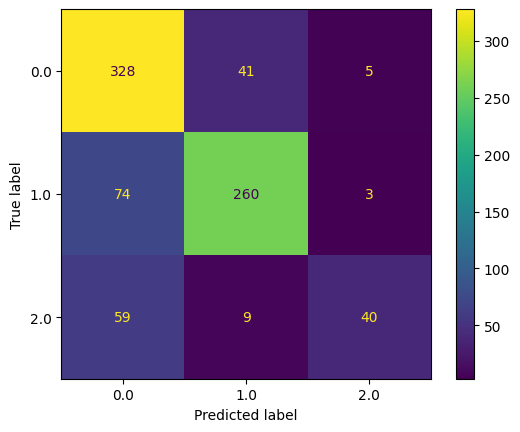

In [22]:
cm = confusion_matrix(y_test_text, y_pred_text, labels=text_embedding_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_embedding_model.classes_)
disp.plot()

### Out of Sample Test 
Curious to test out on rest of the data set to see whether we have gender. 

In [23]:
oos_test = categorized
X_oos_test = oos_test['processed']
X_oos_embed = text_embed.encode(X_oos_test.tolist(), convert_to_tensor=False)
oos_preds = text_embedding_model.predict(X_oos_embed)

oos_test['oos_gender'] = oos_preds


#get exact probabilities for each: y_pred_prob = text_embedding_model.predict_proba(X_oos_embed)
#oos_test[['processed', 'product_gender', 'oos_gender']].head(10)





/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/1199076651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oos_test['oos_gender'] = oos_preds


In [24]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None, 'display.width', None):
    print(oos_test[['product_url','oos_gender']].head(10))

                                         product_url  oos_gender
0   www.tesco.com/groceries/en-GB/products/311203694         0.0
1   www.tesco.com/groceries/en-GB/products/325116457         0.0
3   www.tesco.com/groceries/en-GB/products/313623493         0.0
4   www.tesco.com/groceries/en-GB/products/262504562         0.0
5   www.tesco.com/groceries/en-GB/products/281974782         1.0
6   www.tesco.com/groceries/en-GB/products/314424208         2.0
7   www.tesco.com/groceries/en-GB/products/252223293         1.0
8   www.tesco.com/groceries/en-GB/products/314323282         1.0
9   www.tesco.com/groceries/en-GB/products/260541366         0.0
10  www.tesco.com/groceries/en-GB/products/311784581         0.0


In [25]:
oos_test['oos_gender'].value_counts()

grouped_test = oos_test.groupby('category')['oos_gender'].value_counts().unstack(fill_value=0)
print(grouped_test)

oos_gender            0.0  1.0  2.0
category                           
Adult Intimacy         75    5    9
Body Wash             304  333   57
Cleaning Liquid        36   24  196
Deodorant             328  347    0
Hair Dye              353    8    0
Oral Care             221  117  534
Perfume/Cologne        87   23    1
Razors                155  327    0
Shampoo/Conditioner  1315   45    9
Shaving Cream          14   63    0
Skincare              853  184  110
Supplements           786   75   74
Vape                   86   10  343


# <span style="background-color: yellow">**Model 2 - Logistic regression using image**</span>   



In [113]:
### Cleaning and merging
items_df = categorized.copy()
product_url = pd.read_csv("/Users/cyrilestier/Desktop/data/input/items_2025.csv")
prices_df = pd.read_csv("/Users/cyrilestier/Desktop/data/input/prices_2025_cross_section.csv")

asda = pd.read_csv("/Users/cyrilestier/Desktop/data/input/asda_parsed_item_info.csv")
sainsbury = pd.read_csv("/Users/cyrilestier/Desktop/data/input/sainsburys_product_details.csv")
waitrose = pd.read_csv("/Users/cyrilestier/Desktop/data/input/all_waitrose_item_info.csv")
morrisons = pd.read_csv("/Users/cyrilestier/Desktop/data/input/detailed_item_info_morrisons_2025-03-18_10-46-10.csv")
tesco = pd.read_csv("/Users/cyrilestier/Desktop/data/input/tesco_parsed.csv")

asda = asda[['product_id','store_id','image_url','product_url']]
sainsbury = sainsbury[['product_id','store_id','image_url','product_url']]
waitrose = waitrose[['product_id','store_id','image_url','product_url']]
morrisons = morrisons[['product_id','store_id','image_url','product_url']]
tesco = tesco[['product_id','store_id','image_url','product_url']]

url_df = pd.concat([asda, sainsbury])
url_df = pd.concat([url_df, waitrose])
url_df = pd.concat([url_df, morrisons])
url_df = pd.concat([url_df, tesco])

url_df = url_df.drop_duplicates(subset=['product_url'])
df = items_df.copy()
df = pd.merge(df, url_df, how='left', on = ['product_url'])
#merged_df["store_id"] = merged_df["store_id_x"]
#merged_df = merged_df.drop(columns=["store_id_y", "store_id_x"])
#merged_df = merged_df.set_index("product_id")
#
'''

df['product_id'] = df['product_id'].astype(int)
product_url = product_url[['product_id','store_id','product_url']]
df = df.merge(product_url, on=['product_id', 'store_id'], how = 'left') # I need the product_urls later
'''
df = df.rename(columns={'store_id_x': 'store_id'})
df = df.rename(columns={'product_id_x': 'product_id'})
df = df.drop(columns=['store_id_y', 'product_id_y'])


/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/2558237865.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tesco = pd.read_csv("/Users/cyrilestier/Desktop/data/input/tesco_parsed.csv")


### Scraping images

WARNING: This chunk takes around 10 minutes to run, depending on your internet.

In [116]:
# Function to download images
def download_images(df, images_path):
    # Create the directory if it doesn't exist
    os.makedirs(images_path, exist_ok=True)
    
    for index, row in df.iterrows():
        image_url = str(row['image_url'])
        store_id = row['store_id']
        product_id = row['product_id']
        
        # Check if the image URL has .jpg or .webp
#        if not (image_url.endswith('.gif') or image_url.endswith('.svg') or image_url.endswith('.bmp') or image_url.endswith('.png') or image_url.endswith('.jpg') or image_url.endswith('.jpeg') or image_url.endswith('.webp')) or image_url.endswith('.avif'):
#            continue

        # Determine the file extension
        file_extension = image_url.split('.')[-1]
        file_extension = file_extension.split('?')[0] # Cleaning query parameteres
        if not (file_extension.endswith('.gif') or file_extension.endswith('.svg') or file_extension.endswith('.bmp') or file_extension.endswith('.png') or image_url.endswith('.jpg') or image_url.endswith('.jpeg') or file_extension.endswith('.webp')) or file_extension.endswith('.avif'):
            file_extension = '.jpg'
        # Download the image
        try: 
            response = requests.get(image_url)
            response.raise_for_status()  # Raise an error for bad status codes
        except requests.RequestException as e:
#            print(f"Error downloading {image_url}: {e}")
            continue

        # Save the image with the specified name in the specified directory
        image_name = f"{store_id}_{product_id}.{file_extension}"
        image_path = os.path.join(images_path, image_name)
        with open(image_path, 'wb') as file:
            file.write(response.content)
        
        df.loc[index, 'image_name'] = image_name
        df.loc[index, 'image_path'] = image_path 

#        print(f"Downloaded {image_name} to {images_path}")
# Call the function to download images to the specified directory

images_path = 'data/images/raw/'

download_images(df, images_path)


In [118]:
df_1 = df.copy() # Creating a copy to not rerun the scraping afterwards

In [122]:
df_1.columns

Index(['Unnamed: 0', 'store_id', 'product_id', 'product_title', 'summary',
       'description', 'product_breadcrumb', 'TSDB', 'processed', 'product_url',
       'breadcrumb_clean', 'category', 'product_gender', 'oos_gender',
       'image_url', 'image_name', 'image_path'],
      dtype='object')

## Image analysis

### Getting dominant colours with Kmeans

In [114]:
import os

def rebuild_image_paths(df, images_path):
    # Ensure the path exists
    os.makedirs(images_path, exist_ok=True)
    
    # Create image_name and image_path columns based on stored logic
    for index, row in df.iterrows():
        store_id = row['store_id']
        product_id = row['product_id']
        image_url = str(row['image_url'])

        # Determine file extension from URL
        file_extension = image_url.split('.')[-1].split('?')[0].lower()

        if not (file_extension.endswith('gif') or file_extension.endswith('svg') or
                file_extension.endswith('bmp') or file_extension.endswith('png') or
                file_extension.endswith('jpg') or file_extension.endswith('jpeg') or
                file_extension.endswith('webp')) or file_extension.endswith('avif'):
            file_extension = 'jpg'  # default fallback

        # Build image name and path
        image_name = f"{store_id}_{product_id}.{file_extension}"
        image_path = os.path.join(images_path, image_name)

        # Store in DataFrame
        df.loc[index, 'image_name'] = image_name
        df.loc[index, 'image_path'] = image_path

    return df


In [97]:

df_1 = df.copy() # Creating a copy to not rerun the scraping afterwards.
df_1 = df_1.rename(columns={'store_id_x': 'store_id'})
df_1 = df_1.rename(columns={'product_id_x': 'product_id'})
df_1 = df_1.drop(columns=['store_id_y', 'product_id_y'])


#### Function for getting dominant colours with Kmeans

In [123]:
# Create 'image_name' and 'image_path' columns
def get_dominant_color_kmeans(image_path, k=3):
    try:
        # Open the image
        image = Image.open(image_path)
        
        # Convert to RGB if necessary
        if image.mode != 'RGB':
            image = image.convert('RGB')
            
        image = image.resize((50, 50))  # Reduce size to speed up processing
        pixels = np.array(image).reshape(-1, 3)  # Convert to RGB
        kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
        
        # Reject very dark and very light colors - they're the background
        colour_clusters = kmeans.cluster_centers_.astype(int)
        colour_clusters = colour_clusters[colour_clusters.sum(axis=1) > 100]  # Filter by colours with a sum over 100 (drops blacks)
        colour_clusters = colour_clusters[colour_clusters.sum(axis=1) < 650]  # Filter by colours with a sum under 650 (drops whites)
        return colour_clusters[0]

    except Exception as e:
#        print(f"Error processing image {image_path}: {e}")
        return np.array([0, 0, 0])  # Default to black if an error occurs


#### Subsample with only available images

In [124]:
#df_1 = df_1.dropna(subset='image_name')
#df_1 = df_1.drop_duplicates(subset='image_name')
#df_1 = df_1[df_1['image_path'].str.contains('.jpg', case=False)]

for index, row in df_1.iterrows():
    image_path = row['image_path']

df_1['dominant_color'] = df_1['image_path'].apply(get_dominant_color_kmeans)

def display_clusters(cluster_centers):
    cluster_centers = np.array(cluster_centers, dtype=int)  # Ensure integer values

    plt.figure(figsize=(len(cluster_centers), 1))
    
    for i, color in enumerate(cluster_centers):
        plt.fill_between([i, i + 1], 0, 1, color=np.array(color) / 255)  # Normalize RGB to [0,1]

    plt.xlim(0, len(cluster_centers))
    plt.ylim(0, 1)
    plt.axis("off")  # Hide axes
    plt.show()




huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


#### What are the dominant colours of each product?

In [128]:
# Print dominant color
for img_path, dominant_color in zip(df_1['image_path'][:10], df_1['dominant_color'][:50]):
    if pd.notnull(img_path):  # Add a check to skip the iteration if the image path is nan
        img_path = str(img_path)  # Convert img_path to a string
        image = Image.open(img_path)
        display(image.resize((150, int(150 * image.height / image.width)))) # Displaying the image with a maximum width of 150
        display_clusters([dominant_color]) # Displaying the dominant color of the image


### Merging data with hand labelled sample

In [150]:
sample_all = training_data
sample_all.head()
sample_all['gender_label'].value_counts()
sample_all['label'] = sample_all['gender_label'].apply(lambda x: 'female' if x == 0 else ('male' if x == 1 else ('neutral' if x == 2 else '')))

#image_make = pd.merge(categorized['product_url_x', ],df_1,how='inner', left_on='product_url', right_on='product_url_x')
image_full_sample = pd.merge(training_data,df_1,how='left', left_on='product_url', right_on='product_url')
df_2 = df_1

# Dividing RGB into three variables:
df_2['dominant_color'] = df_2['dominant_color'].astype(str)
df_2['dominant_color'] = df_2['dominant_color'].replace('nan', '[0 0 0]')
df_2[['R', 'G', 'B']] = df_2['dominant_color'].str.strip('[]').str.split(expand=True).astype(int)

#df_2 = df_2[~((df_2['R'] == 0) & (df_2['G'] == 0) & (df_2['B'] == 0))]
df_2['dominant_color'] = df_2['dominant_color'].replace('[0 0 0]', np.nan)

image_full_sample['dominant_color'] = image_full_sample['dominant_color'].astype(str)
image_full_sample['dominant_color'] = image_full_sample['dominant_color'].replace('nan', '[0 0 0]')
image_full_sample[['R', 'G', 'B']] = image_full_sample['dominant_color'].str.strip('[]').str.split(expand=True).astype(int)

#df_2 = df_2[~((df_2['R'] == 0) & (df_2['G'] == 0) & (df_2['B'] == 0))]
image_full_sample['dominant_color'] = image_full_sample['dominant_color'].replace('[0 0 0]', np.nan)




/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_43484/1566577347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_all['label'] = sample_all['gender_label'].apply(lambda x: 'female' if x == 0 else ('male' if x == 1 else ('neutral' if x == 2 else '')))


In [151]:
df_2.shape , image_full_sample.shape
#One is for full sample, the other is for training 

((7507, 21), (2727, 27))

### Finding gendered colors (using hand-labelled products)

#### Splitting 70% in training, 30% in test data

In [ ]:
##stacking method try

In [ ]:
X = df_2.dropna(subset=['label']).drop('label', axis=1) # Dropping subset without label and label column 
X = X[['R','G','B']]

y = df_2['gender_label'].dropna() # Dropping nan for label columns

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#### Logistic model

In [ ]:
# Define the logistic regression model
# Cluster 

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = log_reg.predict(X_test)

# Predict the probabilities for the test data
y_pred_prob = log_reg.predict_proba(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.45054945054945056


#### Saving results in a DF

In [ ]:
results = pd.DataFrame({
    'R': X_test['R'],
    'G': X_test['G'],
    'B': X_test['B'],
    'y': y_test,
    'y_pred': y_pred,
    'y_pred_female': y_pred_prob[:, 0],
    'y_pred_male': y_pred_prob[:, 1],
    'y_pred_neutral': y_pred_prob[:, 2],
    'model_accuracy': [accuracy] * len(y_pred),
})

results = results.merge(df_2, on=['R','G','B'], how='left')


choices = ['female', 'male', 'neutral']
conditions = [
    (results['y_pred_female'] > 0.5),
    (results['y_pred_male'] > 0.5),
    (results['y_pred_neutral'] > 0.5)
]
# Apply conditions to create the new column
results['y_pred_prob'] = np.select(conditions, choices, default='neutral')


results['manual_accuracy'] = accuracy_score(results['y'] , results['y_pred_prob'])


results_ignacio = results.merge(product_url, how='left', on=['product_id','store_id'])

results_ignacio = results_ignacio[['product_url','store_id','product_id','y','y_pred', 'y_pred_prob','y_pred_female','y_pred_male','y_pred_neutral']]

results_ignacio.to_csv('data\output\results_ignacio.csv')


results_ignacio.head()

<>:33: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\o'
/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_41100/3561005344.py:33: SyntaxWarning: invalid escape sequence '\o'
  results_ignacio.to_csv('data\output\results_ignacio.csv')


MergeError: Passing 'suffixes' which cause duplicate columns {'product_url_x'} is not allowed.

## Plotting results

### 1) Dominant colours

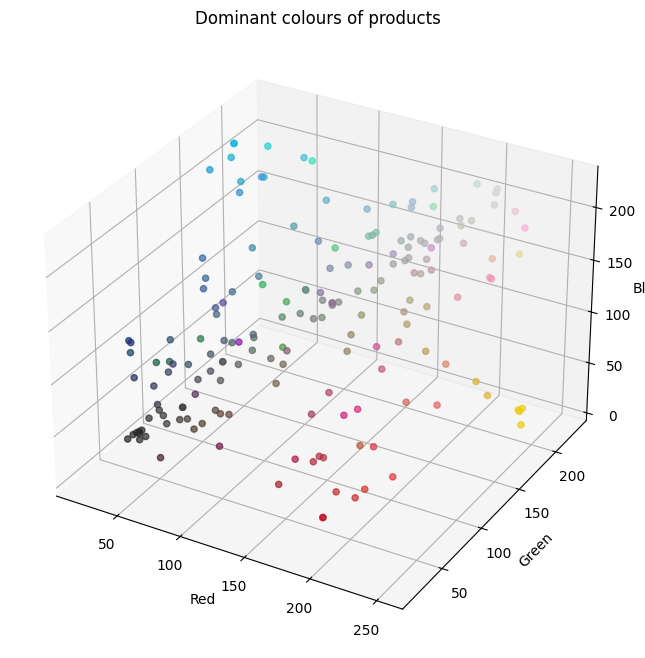

In [ ]:
results_plot = results

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(results['R'], results['G'], results['B'], 
                     c=results[['R', 'G', 'B']]/255, alpha=0.7)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Dominant colours of products')

plt.savefig(r"figures\1_dominant_colours.png")

plt.show()

### 2) Predicted labels in an RGB scatterplot

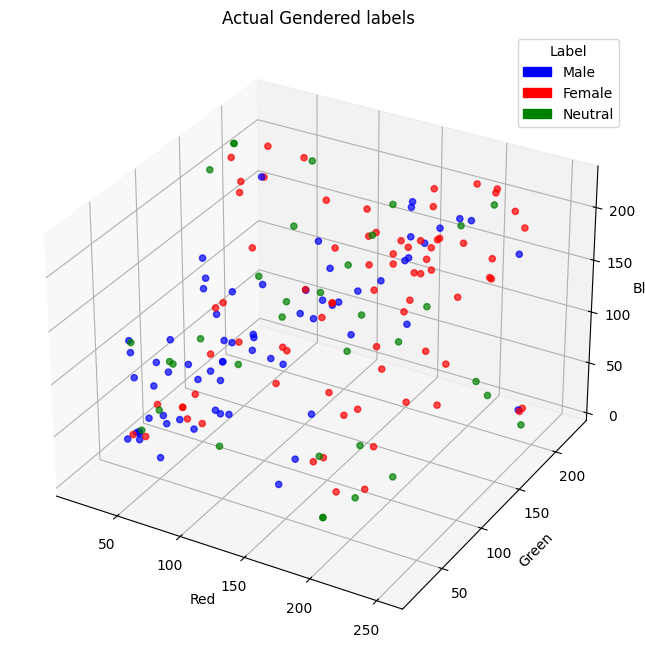

In [ ]:

# Map labels to colors
label_to_color = {'male': 'blue', 'female': 'red', 'neutral': 'green'}
y_train_colors = np.array([label_to_color[label] for label in results['y']])


# Create a 3D map with the test data and cluster labels
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = scatter = ax.scatter(results['R'], results['G'], results['B'], c=y_train_colors, alpha=0.7)
#ax.scatter(X_train_np[:, 0], X_train_np[:, 1], X_train_np[:, 2], c=y_train_colors, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Actual Gendered labels')

# Add a legend
# Create legend patches
male_patch = mpatches.Patch(color='blue', label='Male')
female_patch = mpatches.Patch(color='red', label='Female')
neutral_patch = mpatches.Patch(color='green', label='Neutral')
ax.legend(handles=[male_patch, female_patch, neutral_patch], title="Label")

plt.savefig(r"figures\2_actual_labels.png")

plt.show()

### 3) Actual labels in an RGB scatterplot

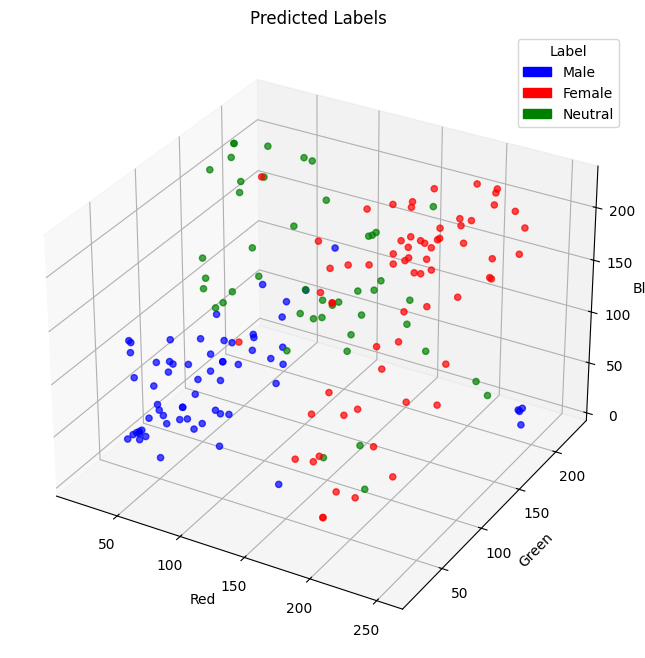

In [ ]:

# Map labels to colors
label_to_color = {'male': 'blue', 'female': 'red', 'neutral': 'green'}
y_train_colors = np.array([label_to_color[label] for label in results['y_pred_prob']])


# Create a 3D map with the test data and cluster labels
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = scatter = ax.scatter(results['R'], results['G'], results['B'], c=y_train_colors, alpha=0.7)


ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Predicted Labels')

# Add a legend
# Create legend patches
male_patch = mpatches.Patch(color='blue', label='Male')
female_patch = mpatches.Patch(color='red', label='Female')
neutral_patch = mpatches.Patch(color='green', label='Neutral')
ax.legend(handles=[male_patch, female_patch, neutral_patch], title="Label")

plt.savefig(r"figures\3_predicted_labels.png")

plt.show()

#### 4) Actual labels (Images)

In [ ]:
#import altair as alt
#from altair_saver import save
#import vl_convert as vlc

results_sample=results.sample(300, random_state=422)

results_sample['rank'] = results_sample['y'].rank()
results_sample['rank_in_colour'] = results_sample.groupby('y')['rank'].rank(method='first')

plot = alt.Chart(results_sample).mark_image(
    width=40,
    height=40,
    opacity=0.9
).encode(
    x=alt.X("y:N", title="Predicted label"),
    y=alt.Y("rank_in_colour:Q", title=""),
    url=alt.Url("image_path:N", title=""),
).properties(
    title="Actual gendered labels",
    width=600,
    height=600
)

plot # Note: I had to save it manually. Click on the three points below and save as PNG
# Save
#plot.save(r"figures\4_actual_labels_images.png")
#plot.save(r"figures\4_actual_labels_images.html")
 

alt.Chart(...)

#### 5) Predicted labels (Images)

In [ ]:
import altair as alt
from altair_saver import save
import vl_convert as vlc

results_sample=results.sample(300, random_state=422)

results_sample['rank'] = results_sample['y_pred_prob'].rank()
results_sample['rank_in_colour'] = results_sample.groupby('y_pred_prob')['rank'].rank(method='first')

plot = alt.Chart(results_sample).mark_image(
    width=30,
    height=30,
    opacity=0.9
).encode(
    x=alt.X("y_pred_prob:N", title="Predicted label"),
    y=alt.Y("rank_in_colour:Q", title=""),
    url=alt.Url("image_path:N", title=""),
).properties(
    title="Predicted gendered labels",
    width=600,
    height=600
)

plot # Note: I had to save it manually. Click on the three points below and save as PNG
# Save
#plot.save(r"figures\3_predicted_labels_images.png")
#plot.save(r"figures\3_predicted_labels_images.html")



alt.Chart(...)

# <span style="background-color: yellow">**Model 3 - Logistic regression using BOW**</span>  

In [144]:
#Aleksandra and I have the same split test which makes it easier. 
X_bow = training_data['processed'] # I redefined X and y to be a single list (not a 2-column df)
y_bow = training_data['gender_label']
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.3, random_state=42)

### Logistic Regression

In [145]:
text_pipe_log = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), min_df=0.1, max_df=0.90, stop_words='english')),
    ('logreg', LogisticRegression(random_state=0, max_iter = 10**3))
])



# Fitting the pipeline to our training data
text_pipe_log.fit(X_train_bow, y_train_bow)   

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=0.1, stop_words='english')),
                ('logreg', LogisticRegression(max_iter=1000, random_state=0))])

In [146]:
# Define parameter grid for tuning
param_grid = {
    'tfidf__ngram_range': [(1,1)], ##, (1,2)],
    'tfidf__min_df': [0.01, 0.2],
    'tfidf__max_df': [0.8, 0.99],
    'logreg__solver': ['saga'],
    'logreg__C': [0.1, 1, 0.05], 
    'logreg__penalty': ['l1','l2','elasticnet'],
    'logreg__l1_ratio' : [0.1, 0.5, 0.9],
}
scoring = {

    'accuracy': 'accuracy',
    'f1_weighted': 'f1_weighted',
    'neg_log_loss': 'neg_log_loss',
    'roc_auc_ovr':'roc_auc_ovr'
}

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=text_pipe_log,
    param_grid=param_grid,
    cv=5,
    n_jobs=1,
    refit='accuracy',
    #verbose=1,
    scoring= scoring
)

In [147]:
import warnings
warnings.filterwarnings("ignore", message="l1_ratio parameter is only used when penalty is 'elasticnet'")

In [149]:
# Fit the model
grid_search.fit(X_train_bow, y_train_bow)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'logreg__C': 1, 'logreg__l1_ratio': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'tfidf__max_df': 0.8, 'tfidf__min_df': 0.01, 'tfidf__ngram_range': (1, 1)}


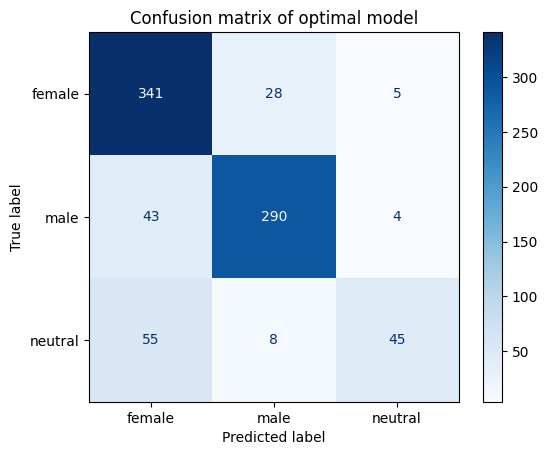


Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       374
         1.0       0.89      0.86      0.87       337
         2.0       0.83      0.42      0.56       108

    accuracy                           0.83       819
   macro avg       0.83      0.73      0.76       819
weighted avg       0.83      0.83      0.82       819

Training Accuracy: 0.8920
Testing Accuracy: 0.8254


In [152]:
# Get best model and predictions
best_model = grid_search.best_estimator_
y_pred_bow = best_model.predict(X_test_bow)

# Confusion matrix
cm = confusion_matrix(y_test_bow, y_pred_bow)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=["female","male","neutral"])
disp.plot(cmap='Blues')
plt.title('Confusion matrix of optimal model')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_bow, y_pred_bow))

# Training accuracy
train_accuracy = best_model.score(X_train_bow, y_train_bow)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Testing accuracy
test_accuracy = best_model.score(X_test_bow, y_test_bow)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Triple model stacking 

### Training & testing model

Its very confusing: 
- all models have the same X_train products BUT different ways of interpeting them (image, semantic, frequency)
- to stack them they all have to be trained on the same set. 
- Step 1) Have all the the train-test set for each 2) Train models on it 3) record each of their predicted probabilities

#Training embedding classifier model 

The split names for the embedding classifier:
X_train_text, X_test_text, y_train_text, y_test_text
The trained model is: 
text_embedding_model

#Training BOW classifier model 

The split names for the BOW is: 
X_train_bow, X_test_bow, y_train_bow, y_test_bow
The trained model is:
best_model

In [156]:
#Training image classifier model 
#Since the image classifier was trained using a different training data set I rerun a model. Then I fill in the probabilities with uniform probabilities when there are no image predictions

X_image = image_full_sample
X_image = X_image[['R','G','B']]
y = image_full_sample['gender_label']
X_train_image, X_test_image, y_train_image, y_test_image = train_test_split(X_image, y, random_state=42, test_size=0.3)
image_model = LogisticRegression()
image_model.fit(X_train_image, y_train_image)



LogisticRegression()

In [158]:
#Model training
probs_bow_train = best_model.predict_proba(X_train_bow)
probs_text_train = text_embedding_model.predict_proba(X_train_text)
probs_image_train = image_model.predict_proba(X_train_image)


X_meta_train = np.hstack([
    probs_bow_train,
    probs_text_train,
    probs_image_train
])

meta_model = LogisticRegression(max_iter=500)
meta_model.fit(X_meta_train, y_train_bow)


LogisticRegression(max_iter=500)

In [160]:
#Full stack model TEST

probs_bow_test = best_model.predict_proba(X_test_bow)
probs_text_test = text_embedding_model.predict_proba(X_test_text)
probs_image_test_raw = image_model.predict_proba(X_test_image)

# Stack for test
X_meta_test = np.hstack([
    probs_bow_test,
    probs_text_test,
    probs_image_test_raw
])                      

# Predict & evaluate
y_pred_stacked = meta_model.predict(X_meta_test)

#print("Accuracy:", accuracy_score(y_test, y_pred_stacked))
print(classification_report(y_test_bow, y_pred_stacked))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.84       374
         1.0       0.88      0.88      0.88       337
         2.0       0.81      0.48      0.60       108

    accuracy                           0.83       819
   macro avg       0.83      0.75      0.78       819
weighted avg       0.83      0.83      0.83       819



In [164]:
#this is what was done for text embedding classifier 
final_classifier = categorized
#Prepare the input for X_embed
X_embed = final_classifier['processed']
X_embed = text_embed.encode(X_embed.tolist(), convert_to_tensor=False)

#Prepare the input for the bow classifier (nothing to do)
X_bow = final_classifier['processed']




In [165]:
#Prepare the input for the image classifier
image_full = df_1
image_full['dominant_color'] = image_full['dominant_color'].astype(str)
image_full['dominant_color'] = image_full['dominant_color'].replace('nan', '[0 0 0]')
image_full[['R', 'G', 'B']] = image_full['dominant_color'].str.strip('[]').str.split(expand=True).astype(int)
#image_full['label'] = image_full['label'].str.lower()
X_image = image_full[['R', 'G', 'B']] 

image_full['dominant_color'] = image_full['dominant_color'].replace('[0 0 0]', np.nan)
final_classifier['dominant_color'] = image_full['dominant_color']
#X_image = final_classifier['dominant_color']

In [166]:
X_image.shape, X_embed.shape, X_bow.shape

((7507, 3), (7507, 384), (7507,))

In [167]:

embed_final_pred = text_embedding_model.predict(X_embed)
bow_final_pred = best_model.predict(X_bow)
image_final_pred = image_model.predict(X_image)

final_classifier['embedding_class'] = embed_final_pred
final_classifier['bow_class'] = bow_final_pred
final_classifier['image_class'] = image_final_pred


#Final classifier model

probs_bow_final = best_model.predict_proba(X_bow)
probs_embed_final = text_embedding_model.predict_proba(X_embed)
probs_image_final = image_model.predict_proba(X_image)

X_meta_final = np.hstack([
    probs_bow_final,
    probs_embed_final,
    probs_image_final
])  

final_classification = meta_model.predict(X_meta_final)
final_classifier['final_classifier'] = final_classification

In [169]:
absolute_final_classifier = final_classifier[['product_url','store_id','product_id','category','processed','final_classifier','dominant_color','embedding_class','bow_class','image_class','product_gender']]

#absolute_final_classifier[['product_url','final_classifier','bow_class','embedding_class','image_class']].head(25)
absolute_final_classifier_test = absolute_final_classifier.groupby('category')['final_classifier'].value_counts().unstack(fill_value=0)
absolute_final_classifier_test

final_classifier      0.0  1.0  2.0
category                           
Adult Intimacy         66    9   14
Body Wash             173  387  134
Cleaning Liquid        31   10  215
Deodorant             325  350    0
Hair Dye              354    7    0
Oral Care             154   44  674
Perfume/Cologne        76   34    1
Razors                171  311    0
Shampoo/Conditioner  1250   86   33
Shaving Cream          16   61    0
Skincare              594  149  404
Supplements           804   92   39
Vape                   52    5  382

In [170]:
absolute_final_classifier[['product_url','final_classifier','bow_class','embedding_class','image_class']].head(25)

product_url  final_classifier  \
0   www.tesco.com/groceries/en-GB/products/311203694               0.0   
1   www.tesco.com/groceries/en-GB/products/325116457               0.0   
3   www.tesco.com/groceries/en-GB/products/313623493               0.0   
4   www.tesco.com/groceries/en-GB/products/262504562               0.0   
5   www.tesco.com/groceries/en-GB/products/281974782               1.0   
6   www.tesco.com/groceries/en-GB/products/314424208               2.0   
7   www.tesco.com/groceries/en-GB/products/252223293               1.0   
8   www.tesco.com/groceries/en-GB/products/314323282               1.0   
9   www.tesco.com/groceries/en-GB/products/260541366               2.0   
10  www.tesco.com/groceries/en-GB/products/311784581               0.0   
11  www.tesco.com/groceries/en-GB/products/287615565               0.0   
12  www.tesco.com/groceries/en-GB/products/311262974               1.0   
13  www.tesco.com/groceries/en-GB/products/325227065               1.0   
14  www.tesco.com/groceries/en-GB/products/301360723               2.0   
15  www.tesco.com/groceries/en-GB/products/299250499               0.0   
16  www.tesco.com/groceries/en-GB/products/290873473               0.0   
17  www.tesco.com/groceries/en-GB/products/325227072               1.0   
18  www.tesco.com/groceries/en-GB/products/296070630               1.0   
19  www.tesco.com/groceries/en-GB/products/281975026               1.0   
20  www.tesco.com/groceries/en-GB/products/305730549               0.0   
21  www.tesco.com/groceries/en-GB/products/317182097               0.0   
22  www.tesco.com/groceries/en-GB/products/254806107               0.0   
23  www.tesco.com/groceries/en-GB/products/300953588               2.0   
25  www.tesco.com/groceries/en-GB/products/302134915               1.0   
26  www.tesco.com/groceries/en-GB/products/258810429               0.0   

    bow_class  embedding_class  image_class  
0         0.0              0.0          1.0  
1         0.0              0.0          1.0  
3         0.0              0.0          1.0  
4         0.0              0.0          1.0  
5         1.0              1.0          1.0  
6         2.0              2.0          1.0  
7         1.0              1.0          1.0  
8         1.0              1.0          1.0  
9         0.0              0.0          1.0  
10        0.0              0.0          1.0  
11        0.0              0.0          1.0  
12        1.0              1.0          1.0  
13        1.0              1.0          1.0  
14        2.0              2.0          1.0  
15        0.0              0.0          1.0  
16        0.0              1.0          1.0  
17        1.0              1.0          1.0  
18        1.0              1.0          1.0  
19        1.0              1.0          1.0  
20        0.0              0.0          1.0  
21        0.0              0.0          1.0  
22        0.0              0.0          1.0  
23        2.0              2.0          1.0  
25        1.0              0.0          1.0  
26        0.0              0.0          1.0

In [172]:
absolute_final_classifier.to_csv('absolute_final_classifier.csv')

----

----

# <span style="background-color: yellow">**Discount price**</span>
Is there a difference between genders on how grocery stores play with prices?

In [ ]:
#Merging the gender items data with prices data
prices_all = pd.merge(prices_df,oos_test, on=['product_id','store_id'],how='inner')
#Narrowing down data only to loyalty prices
prices_discount = prices_all.dropna(subset = ['loyalty_price'])

#Narrowing down data only to price differences
prices_all = prices_all.dropna(subset = ['original_price'])
prices_reduction = prices_all[prices_all['original_price'] != prices_all['price']]

#Data combined with loyalty and discount prices
full_data = pd.merge(prices_discount, prices_reduction, how = 'outer')

#Add price difference between original price and price
full_data['price_difference'] = full_data['original_price'] - full_data['price']



### Loyalty count = how many loyalty prices per gender 

In [ ]:
loyalty_count = full_data.groupby('oos_gender')['loyalty_price'].count()
loyalty_count_percentage = (loyalty_count / loyalty_count.sum()) * 100
loyalty_count_percentage

oos_gender
0.0    52.191235
1.0    22.310757
2.0    25.498008
Name: loyalty_price, dtype: float64

### Discount mean = how many on average do prices change per gender

In [ ]:
full_data_discount = full_data.groupby('oos_gender')['price_difference'].mean()
full_data_discount

oos_gender
0.0    3.071970
1.0    3.084853
2.0    5.898261
Name: price_difference, dtype: float64

## 

### Discount min-max = extreme values smallest discount to largest discount

In [ ]:
min_max_by_group = full_data.groupby('oos_gender')['price_difference'].agg(['min', 'max'])
min_max_by_group

min    max
oos_gender            
0.0         0.1  19.95
1.0         0.3  30.00
2.0         0.5  70.00

### Discount count = how many gender targeted products have price differences 

In [ ]:
full_data_discount_count = full_data.groupby('oos_gender')['price_difference'].count()
full_data_discount_percentage = (full_data_discount_count / full_data_discount_count.sum()) * 100
full_data_discount_percentage

oos_gender
0.0    50.847458
1.0    31.432974
2.0    17.719569
Name: price_difference, dtype: float64